## Observations and Insights 

3 observations or inferences that can be made from the data:

1. According to the graph for mouse weight and average tumor volume for the Capomulin regimen there is a strong positive relationship between the two. The correlation coefficient is .84

2. The sex of the mouse studied does not change the effects of the regimen used. During the tests the sex of the mouse is almost at a 50/50 split meaning there is no observation of the regimen having different effects based on the sex of the mouse.

3. Based off the mean for the tumor volume captured during the analysis, Ramicane has the lowest average tumor volume at 40.216745 while Ketapril has the highest average tumor volume at 55.235638.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()


249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df[merged_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM" : sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
bar_info_df = clean_df.groupby("Drug Regimen").count()
bar_info_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


Text(0.5, 0, 'Drug Regimen')

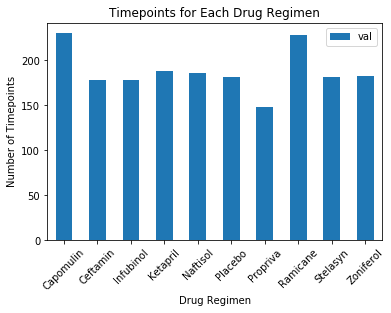

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df = pd.DataFrame({'drug regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
                   'val':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df.plot.bar(x='drug regimen', y='val', rot=45)
plt.title("Timepoints for Each Drug Regimen")
plt.ylabel('Number of Timepoints')
plt.xlabel("Drug Regimen")


Text(0, 0.5, 'Number of Timepoints')

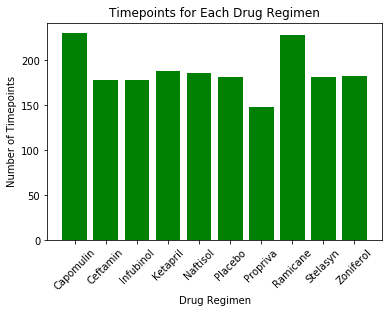

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(x_axis, drug_count, color = 'g', align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)

plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

([<matplotlib.patches.Wedge at 0x7fe6b8a700b8>,
 [Text(0.013934097579311265, 1.0999117423341975, ''),
  Text(-0.0139340975793114, -1.0999117423341975, '')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

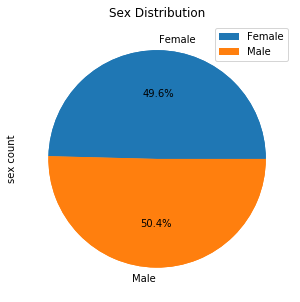

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df = pd.DataFrame({'sex count': [123, 125]}, 
                   index=['Female', 'Male'])

plot = df.plot.pie(y='sex count', figsize=(5, 5))

plt.title("Sex Distribution")
sex_count = [123, 125]
plt.pie(sex_count, autopct='%1.1f%%')

(-1.1192168963081732,
 1.1079352522711863,
 -1.1167571903773796,
 1.1085810220189514)

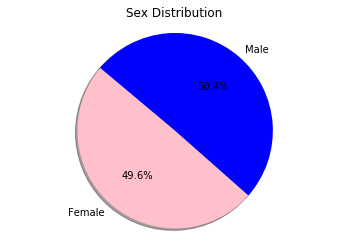

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = [123, 125]

colors = ["pink", "blue"]

plt.pie(sizes, labels = labels, colors = colors,
       autopct = "%1.1f%%", shadow=True, startangle=140)

plt.title("Sex Distribution")

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_data_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_data_df = final_data_df.sort_values(["Timepoint"], ascending=False)
final_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes    
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [35]:
#Capomulin

Capomulin_sort = final_data_df.loc[final_data_df["Drug Regimen"] == "Capomulin"]   

Capomulin_df = Capomulin_sort.sort_values("Timepoint", ascending = False)
Capomulin_df = Capomulin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
104,u364,Capomulin,Male,18,17,45,31.023923,3
164,t565,Capomulin,Female,20,17,45,34.455298,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
282,l897,Capomulin,Male,17,19,45,38.846876,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [37]:
tumor_vol_Capomulin = Capomulin_df['Tumor Volume (mm3)']
tumor_vol_Capomulin

440     47.685963
144     33.329098
134     32.377357
124     31.896238
104     31.023923
164     34.455298
244     37.074024
282     38.846876
299     38.939633
224     36.041047
309     38.982878
337     38.125164
204     37.311846
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
29      28.484033
39      28.430964
19      23.343598
317     38.753265
64      30.485985
1455    46.539206
340     39.952347
Name: Tumor Volume (mm3), dtype: float64

In [55]:
#Capomulin - quartile calculations & outlier calculations

quartiles = tumor_vol_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [39]:
#Ramicane

Ramicane_sort = final_data_df.loc[final_data_df["Drug Regimen"] == "Ramicane"]   

Ramicane_df = Ramicane_sort.sort_values("Timepoint", ascending = False)
Ramicane_df = Ramicane_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
154,c758,Ramicane,Male,9,17,45,33.397653,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
94,j913,Ramicane,Female,4,17,45,31.560470,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
420,q597,Ramicane,Male,20,25,45,45.220869,2
410,u196,Ramicane,Male,18,25,45,40.667713,3
254,i334,Ramicane,Female,8,20,45,36.374510,2
272,d251,Ramicane,Female,8,19,45,37.311236,2


In [40]:
tumor_vol_Ramicane = Ramicane_df['Tumor Volume (mm3)']
tumor_vol_Ramicane

154    33.397653
114    31.095335
94     31.560470
84     30.638696
74     30.564625
430    43.047543
420    45.220869
410    40.667713
254    36.374510
272    37.311236
234    37.225650
214    38.810366
327    38.407618
194    36.134852
184    33.562402
174    32.978522
400    40.659006
59     30.276232
9      22.050126
49     29.128472
262    36.561652
289    38.342008
447    43.419381
453    44.183451
449    43.166373
Name: Tumor Volume (mm3), dtype: float64

In [54]:
#Ramicane - quartile calculations & outlier calculations

quartiles = tumor_vol_Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [41]:
#Infubinol

Infubinol_sort = final_data_df.loc[final_data_df["Drug Regimen"] == "Infubinol"]   

Infubinol_df = Infubinol_sort.sort_values("Timepoint", ascending = False)
Infubinol_df = Infubinol_sort.drop_duplicates(subset="Mouse ID", keep='first')
Infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
637,c139,Infubinol,Male,11,28,45,72.226731,2
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
540,a685,Infubinol,Male,8,30,45,66.083066,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
949,i386,Infubinol,Female,23,29,40,67.289621,4


In [42]:
tumor_vol_Infubinol = Infubinol_df['Tumor Volume (mm3)']
tumor_vol_Infubinol

1872    62.754451
800     62.435404
463     67.973419
473     65.525743
637     72.226731
834     60.918767
1053    66.196912
540     66.083066
1813    67.685569
949     67.289621
1076    62.117279
1312    55.629428
1397    54.656549
1225    60.165180
530     57.031862
1726    58.268442
742     60.969711
1485    55.650681
1683    50.005138
1632    54.048608
1640    51.542431
669     36.321346
1314    45.699331
1616    46.250112
1205    47.010364
Name: Tumor Volume (mm3), dtype: float64

In [56]:
#Infubinol - quartile calculations & outlier calculations

quartiles = tumor_vol_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [43]:
#Ceftamin

Ceftamin_sort = final_data_df.loc[final_data_df["Drug Regimen"] == "Ceftamin"]   

Ceftamin_df = Ceftamin_sort.sort_values("Timepoint", ascending = False)
Ceftamin_df = Ceftamin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1379,p438,Ceftamin,Female,11,26,45,61.433892,1


In [44]:
tumor_vol_Ceftamin = Ceftamin_df['Tumor Volume (mm3)']
tumor_vol_Ceftamin

493     62.999356
1260    59.741901
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1845    68.594745
1797    61.386660
1379    61.433892
1855    64.729837
1670    67.527482
1773    64.634949
1406    64.192341
1119    57.918381
617     55.742829
600     56.057749
1582    52.925348
840     48.722078
1122    46.784535
940     47.784682
1743    45.000000
594     45.000000
1551    45.000000
1583    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [57]:
#Ceftamin - quartile calculations & outlier calculations

quartiles = tumor_vol_Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


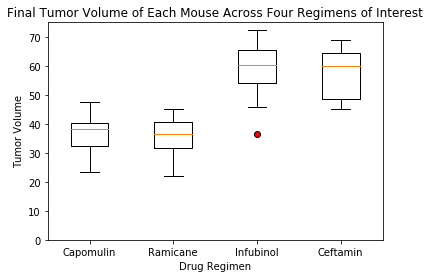

In [51]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax7.set_ylabel('Tumor Volume')
ax7.set_xlabel('Drug Regimen')
data = [tumor_vol_Capomulin, tumor_vol_Ramicane, tumor_vol_Infubinol, tumor_vol_Ceftamin]
plt.ylim(0, 75)
red_dot = dict(markerfacecolor='r', marker='o')
ax7.boxplot(data, flierprops=red_dot, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin',])

plt.show()

## Line and Scatter Plots

In [59]:
test_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin"])]
test_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [60]:
test_mouse_df = test_df.loc[test_df["Mouse ID"] == "s185"]
test_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point with Capomulin')

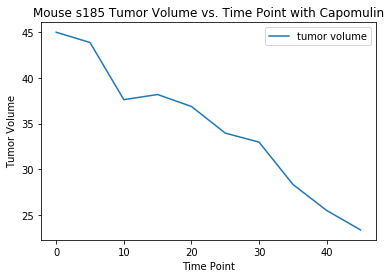

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplt_df = pd.DataFrame({
   'tumor volume': [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
      }, index = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
lines = lineplt_df.plot.line()

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse s185 Tumor Volume vs. Time Point with Capomulin")


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [61]:
scatter_df = test_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [62]:
avg_tumor_vol = scatter_df.groupby(scatter_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [63]:
each_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].mean()
each_mouse_weight

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

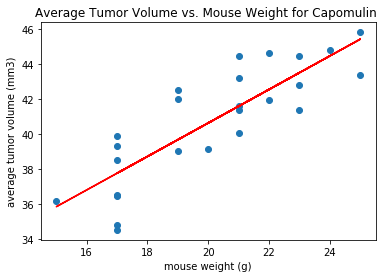

In [64]:
# Scatter Plot

y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()

## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(each_mouse_weight, avg_tumor_vol)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}.")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


In [68]:
#linear regression model on average tumor volume vs. mouse weight for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values + slope + intercept
print(regress_values)


[44.50660022 43.50660022 39.50660022 41.50660022 44.50660022 46.50660022
 42.50660022 45.50660022 43.50660022 43.50660022 41.50660022 39.50660022
 41.50660022 47.50660022 39.50660022 47.50660022 39.50660022 45.50660022
 39.50660022 39.50660022 43.50660022 45.50660022 43.50660022 37.50660022
 39.50660022]


In [69]:
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
print(line_eq)

y = 0.95x +21.55


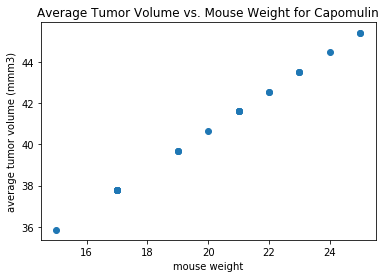

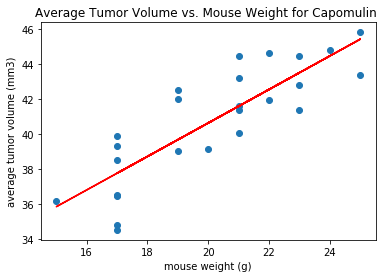

In [73]:
# Scatter Plot Joined

plt.scatter(x_values, y_values)
plt.xlabel('mouse weight')
plt.ylabel('average tumor volume (mmm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin')
plt.show()

y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()